# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were both given to more mice than any other drug regimens in the study, and interestingly both had the lowest median tumor volume of the different regimens (both in and out of the smaller 4 drug sub-study performed in our calculations).
- Treatment with Capomulin showed a strong tendency for the tumors to stage a dramtic drop in volume the further the mice got through treatment.  Although we didn't perform the same analysis with Ramicane, I would not be surprised to see a similar pattern emerge given it also had much lower ending average tumor volumes than the other treatments in the sub-study.  This would be an interesting calculation to perform across other (seemingly less successful) drugs within the study.
- The correlation coefficient of weight vs average tumor volume with Capomulin was very high at 0.84, and the slope of the regression line equation was nearly 1 - indicating an almost linear relationship between weight and average tumor volume.  Intuitively this makes sense as it would mean that as a percentage of their body weight, the average tumor volume doesn't fluctuate much from mouse to mouse within a given study.  Running this regression analysis across the other drugs in the study would be worthwhile, or at least on Ramicane at a minimum - given its low average ending tumor volumes. 
 

In [21]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice.
mice_count = mouse_df["Mouse ID"].nunique()
mice_count

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= mouse_df[mouse_df[["Mouse ID", "Timepoint"]].duplicated()]
duplicate_mice["Mouse ID"].unique()


array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_df[mouse_df["Mouse ID"] == "g989"]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df.rename(columns={"Mouse ID": "Mouse_ID"},inplace=True)
cleaned_mouse_df = pd.DataFrame(mouse_df[mouse_df.Mouse_ID != "g989"])
cleaned_mouse_df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df["Mouse_ID"].nunique()


248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = cleaned_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = cleaned_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_sd = cleaned_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = {"Mean Tumor Volume": tumor_mean,
                 "Median Tumor Volume": tumor_median,
                 "Tumor Volume Variance": tumor_variance,
                 "Tumor Volume Std. Dev.": tumor_sd,
                 "Tumor Volume Std. Err.": tumor_sem}

summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
cleaned_mouse_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

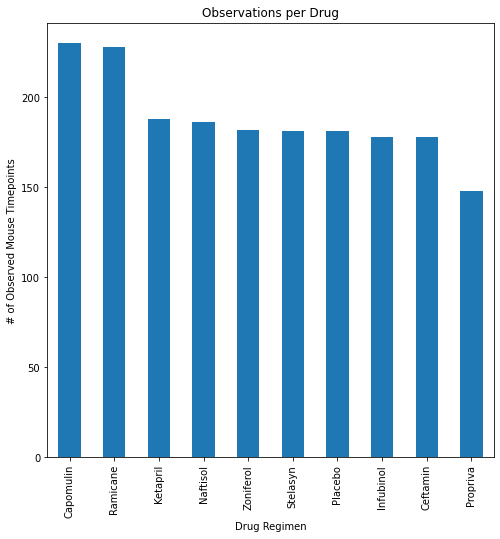

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = cleaned_mouse_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pandas_bar_df = pd.DataFrame(pandas_bar)
# pandas_bar_df = pandas_bar_df.set_index("Drug Regimen")
pandas_bar_df.plot(kind="bar",figsize=(8,8),legend=False)
#set a title
plt.title("Observations per Drug")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


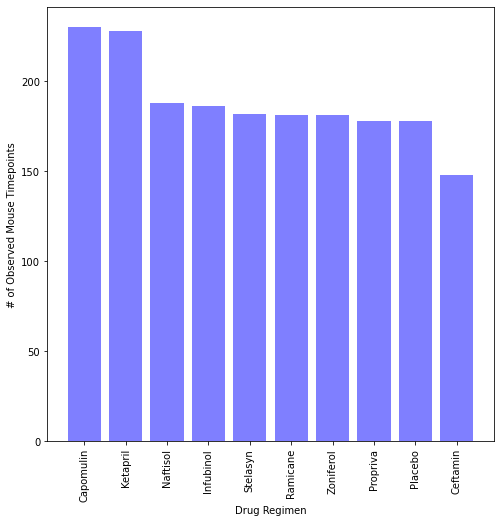

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = cleaned_mouse_df["Drug Regimen"].unique()
observations = cleaned_mouse_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
#set x_axis and tick locations
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

#adjust size of plot
plt.figure(figsize=(8,8))

#plot the data, rotate the x axis lables, add an x and y axis description
plt.bar(x_axis, observations, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations,drugs,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

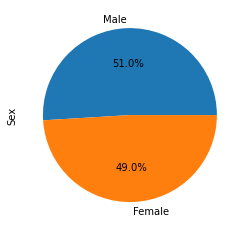

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = cleaned_mouse_df["Sex"].value_counts().plot(kind="pie",y="Sex",autopct="%1.1f%%")


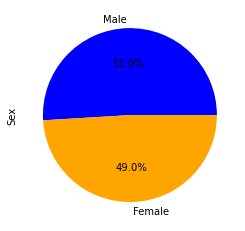

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#define and create labels, count by sex, define colors and explode values
count = cleaned_mouse_df["Sex"].value_counts()
colors = ["blue","orange"]
explode = (0,0)
# # # # #create pie plot
plt.pie(count,explode=explode,labels=count.index,colors=colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse#
final_timepoint = cleaned_mouse_df.groupby(["Mouse_ID"])["Timepoint"].last()
final_timepoint = final_timepoint.reset_index()
final_timepoint_df = pd.DataFrame(final_timepoint)

 # Merge this group df with the original DataFrame 
 # to get the tumor volume at the last timepoint
final_tumor_df = final_timepoint_df.merge(cleaned_mouse_df,how="left",on=["Mouse_ID","Timepoint"])
final_tumor_df.head()


,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add each tumor volume result to the vol_data list
    vol_data.append(treatment_tumor_vol)
    #determine the upper bound, lower bound and IQR for each drug regimen
    quartiles = treatment_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    center = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = treatment_tumor_vol.loc[(treatment_tumor_vol < lower_bound) | (treatment_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


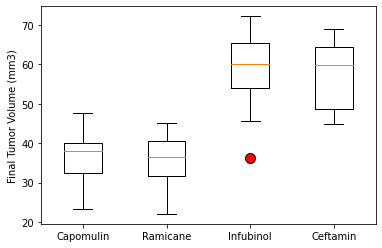

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = plt.boxplot(vol_data,labels=treatments,
                      flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

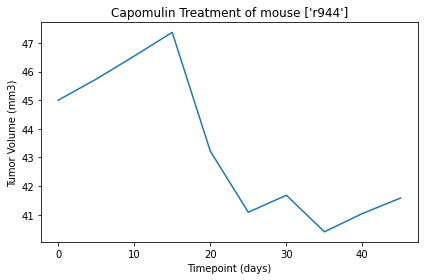

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#sort data by mice who were treated with Capomulin
capomulin_mice= cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]=="Capomulin"]
#pick a random mouse from dataset
sample_mouse = capomulin_mice["Mouse_ID"].sample()
sample_mouse_id = sample_mouse
sample_mouse_data = cleaned_mouse_df.loc[cleaned_mouse_df["Mouse_ID"]==sample_mouse_id.values[0]]
#create a df of only the sample mouse's data
sample_mouse_df = pd.DataFrame(sample_mouse_data)
#sort the data by timepoint and set values for x and y axis
sorted_sample_mouse_data = sample_mouse_df.sort_values("Timepoint")
sample_mouse_timepoints = sorted_sample_mouse_data["Timepoint"]
sample_mouse_tumors = sorted_sample_mouse_data["Tumor Volume (mm3)"]
#create the plot
plt.plot(sample_mouse_timepoints,sample_mouse_tumors)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of mouse {sample_mouse_id.values}")
plt.tight_layout()
plt.show()


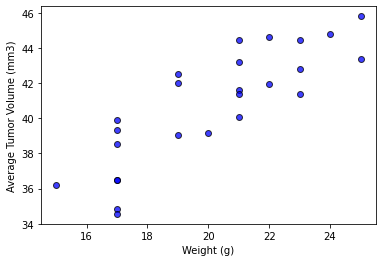

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#find the average tumor volume by mouse and find the mouse's corresponding weight
capomulin_mice_df = pd.DataFrame(capomulin_mice)
capomulin_avg_tumor = capomulin_mice_df.groupby("Mouse_ID")["Tumor Volume (mm3)"].mean()
capomulin_avg_tumor = capomulin_avg_tumor.astype(float)
capomulin_mice_weight = capomulin_mice_df.groupby("Mouse_ID")["Weight (g)"].unique()
capomulin_mice_weight = capomulin_mice_weight.astype(float)
#plot the data
plt.scatter(capomulin_mice_weight,capomulin_avg_tumor,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


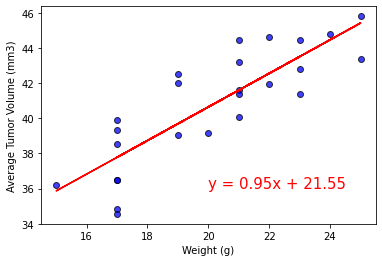

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
tumor_weight_corr = st.pearsonr(capomulin_mice_weight,capomulin_avg_tumor)
# Print the Pearson's coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(tumor_weight_corr[0],2)}")
# Run the regression and add the regression line and equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mice_weight, capomulin_avg_tumor)
regress_values = capomulin_mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(capomulin_mice_weight,capomulin_avg_tumor,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(capomulin_mice_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
